In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('CSV_files/nba_players.csv')
data.head()

,id,first_name,last_name,position,id_team,abbreviation,city,conference,division,full_name,name
0,14,Ike,Anigbogu,C,12,IND,Indiana,East,Central,Indiana Pacers,Pacers
1,25,Ron,Baker,G,20,NYK,New York,East,Atlantic,New York Knicks,Knicks
2,47,Jabari,Bird,G,2,BOS,Boston,East,Atlantic,Boston Celtics,Celtics
3,67,MarShon,Brooks,G,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies
4,71,Lorenzo,Brown,G,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors


In [2]:
print('Data shape:', data.shape)
data.info()

Data shape: (1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1000 non-null   int64 
 1   first_name    1000 non-null   object
 2   last_name     1000 non-null   object
 3   position      87 non-null     object
 4   id_team       1000 non-null   int64 
 5   abbreviation  1000 non-null   object
 6   city          1000 non-null   object
 7   conference    1000 non-null   object
 8   division      1000 non-null   object
 9   full_name     1000 non-null   object
 10  name          1000 non-null   object
dtypes: int64(2), object(9)
memory usage: 86.1+ KB


In [3]:
print(data.value_counts('position'))

position
G      40
F      28
C      13
C-F     2
F-C     2
G-F     2
Name: count, dtype: int64


In [4]:
data.isnull().sum()

id                0
first_name        0
last_name         0
position        913
id_team           0
abbreviation      0
city              0
conference        0
division          0
full_name         0
name              0
dtype: int64

In [5]:
data['position_filled'] = data['position'].fillna('NaN')

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Position_encoded'] = label_encoder.fit_transform(data['position'])


In [7]:
# Total and percentage of missing values
missing = data.isnull().sum()
missing_percent = (missing / len(data)) * 100
missing_df = pd.DataFrame({"Missing Values": missing, "Percent": missing_percent})
print(missing_df[missing_df["Missing Values"] > 0].sort_values("Percent", ascending=False))


          Missing Values  Percent
position             913     91.3


In [8]:
print("\nPosition Value Counts:\n", data['position'].value_counts(dropna=False))
print("\nConference Value Counts:\n", data['conference'].value_counts())
print("\nDivision Value Counts:\n", data['division'].value_counts())



Position Value Counts:
 position
NaN    913
G       40
F       28
C       13
C-F      2
F-C      2
G-F      2
Name: count, dtype: int64

Conference Value Counts:
 conference
West    504
East    496
Name: count, dtype: int64

Division Value Counts:
 division
Southeast    191
Pacific      190
Northwest    181
Central      166
Atlantic     139
Southwest    133
Name: count, dtype: int64


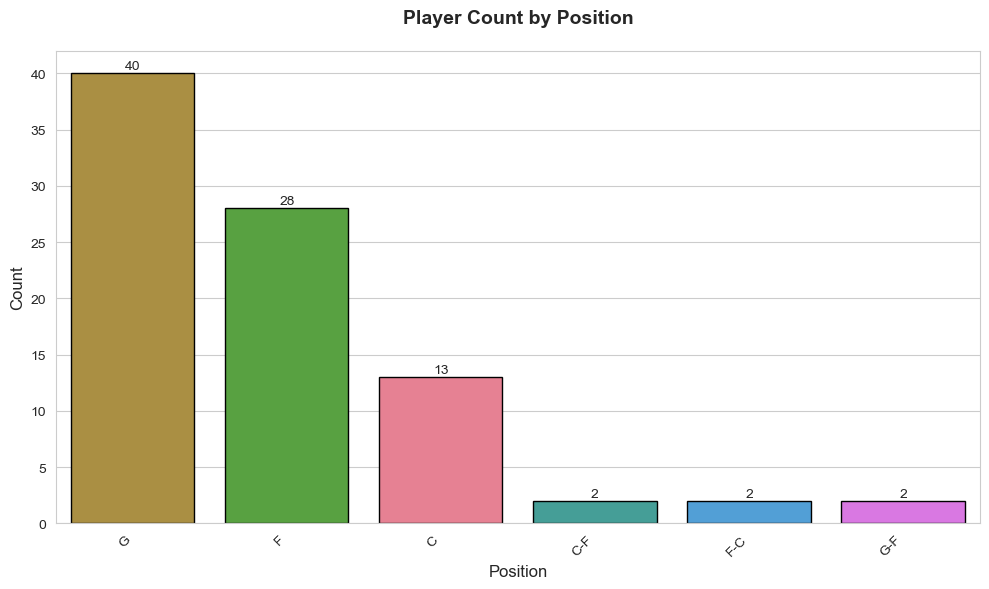

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and get unique positions
sns.set_style("whitegrid")
unique_positions = data['position'].nunique()
position_order = data['position'].value_counts().index

# Create plot with proper hue assignment
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=data,
    x='position',
    hue='position',  # Added to address deprecation warning
    palette=sns.color_palette("husl", n_colors=unique_positions),
    order=position_order,
    edgecolor='black',
    linewidth=1,
    legend=False  # Added to prevent duplicate legend
)

# Customize plot appearance
plt.title("Player Count by Position", fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10
    )

plt.tight_layout()
plt.savefig('player_count_by_position.png', dpi=300, bbox_inches='tight')
plt.show();

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Players per Conference')

Text(0.5, 0, 'Conference')

Text(0, 0.5, 'Number of Players')

([0, 1], [Text(0, 0, 'West'), Text(1, 0, 'East')])

Text(0, 5, '496')

Text(0, 5, '504')

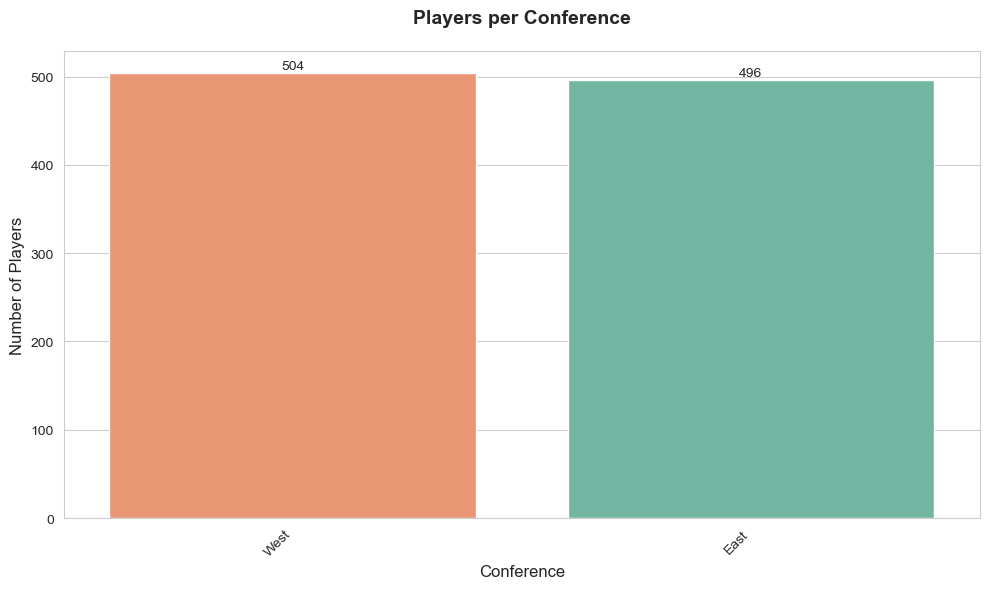

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and get data
sns.set_style("whitegrid")
conference_order = data['conference'].value_counts().index

# Create plot with proper parameters
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=data,
    x='conference',
    hue='conference',  # Required for palette in future versions
    palette='Set2',
    order=conference_order,
    edgecolor='white',
    linewidth=1,
    legend=False  # Disable legend when using hue
)

# Customize plot appearance
plt.title("Players per Conference", fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Conference", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=10
    )

# Adjust layout and save
plt.tight_layout()
plt.savefig("players_per_conference.png", dpi=300, bbox_inches='tight')
plt.show()


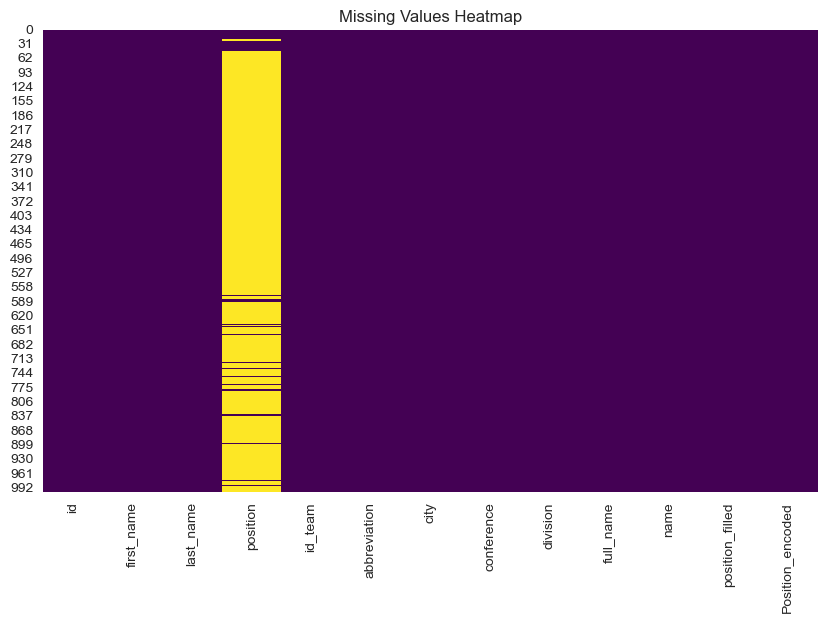

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.savefig("Missing Values Heatmap.png", dpi=300)
plt.show();

In [18]:
print("Duplicate IDs:", data.duplicated(subset='id').sum())
print("Duplicate Names:", data.duplicated(subset='full_name').sum())

Duplicate IDs: 25
Duplicate Names: 971


In [25]:
data = data.drop_duplicates(subset=['id'], keep='first')

In [26]:
print("Duplicate IDs:", data.duplicated(subset='id').sum())

Duplicate IDs: 0


In [29]:
data_clean = data.dropna(subset=['position'])

In [34]:
categorical_features = ['conference', 'division', 'abbreviation']
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [37]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [39]:
X = data_clean[['conference', 'division', 'abbreviation']]
y = data_clean['position']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['conference', 'division',
                                                   'abbreviation'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [47]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4444444444444444

Classification Report:
               precision    recall  f1-score   support

           C       1.00      0.50      0.67         2
         C-F       0.00      0.00      0.00         0
           F       0.33      0.17      0.22         6
           G       0.46      0.67      0.55         9
         G-F       0.00      0.00      0.00         1

    accuracy                           0.44        18
   macro avg       0.36      0.27      0.29        18
weighted avg       0.45      0.44      0.42        18



C:\Users\Ken\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken\anaconda3\Lib\site-packages\sklearn\metri

In [48]:
new_players = pd.DataFrame({
    'conference': ['East'],
    'division': ['Atlantic'],
    'abbreviation': ['NYK']
})

# Predict position
predicted_pos = model.predict(new_players)
print("Predicted Position:", predicted_pos[0])

Predicted Position: G
